In [8]:
#importing necessary libraries
import numpy as np
import scipy
import scipy.stats.stats as stat
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import matplotlib
import seaborn as sb
from io import StringIO
import re
import matplotlib.pyplot as plt
import pandas as pd
import urllib3 as urllib
import csv
from sklearn.model_selection import train_test_split

%matplotlib inline

<h2>Downloading and Processing the Data</h2>

In [4]:
'''
Downloading the Data 
-Retrieve the echocardiogram data from the web address.
-Load the Data into a pandas dataframe
'''

# load in the data locally
with open('echocardiogram.data.txt') as input_file:
   lines = input_file.readlines()
   newLines = []
   for line in lines:
      newLine = line.strip().split(',')
      newLines.append( newLine )

with open('ecgData.csv', 'w') as test_file:
   file_writer = csv.writer(test_file)
   file_writer.writerows( newLines )
    
#Read the data into a pandas dataframe

columnNames = ['survival','still-alive','age-at-heart-attack','pericardial-effusion','fractional-shortening','epss','lvdd','wall-motion-score','wall-motion-index','mult','name','group','alive-at-1']
table = pd.read_csv('ecgData.csv',names=columnNames)

#Clear the useless columns:

uselessCols = ['mult','name','group']
table.drop(uselessCols, inplace=True, axis=1)
               
table

# Validate the data
def check_column(data,col):
    data[col] = data[col].replace('?',np.nan)
    return data[col]
#b)
def validate(data):
    for column in data:
        data[column]= check_column(data,column)
    return data

table = validate(table)

# Remove all na values:
table = table.dropna(axis=0, how='any')
table

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,wall-motion-index,alive-at-1
0,11,0,71,0,0.260,9,4.600,14,1,0
1,19,0,72,0,0.380,6,4.100,14,1.700,0
2,16,0,55,0,0.260,4,3.420,14,1,0
3,57,0,60,0,0.253,12.062,4.603,16,1.450,0
4,19,1,57,0,0.160,22,5.750,18,2.250,0
5,26,0,68,0,0.260,5,4.310,12,1,0
6,13,0,62,0,0.230,31,5.430,22.5,1.875,0
7,50,0,60,0,0.330,8,5.250,14,1,0
8,19,0,46,0,0.340,0,5.090,16,1.140,0
9,25,0,54,0,0.140,13,4.490,15.5,1.190,0


# Logistic Regression:


In [5]:
# Output Column (Can we predict if the patient is alive after 1 year?)
y = table[['still-alive']]
#Factors used to predict the output
x = table[['age-at-heart-attack','fractional-shortening','lvdd','wall-motion-score']]

xtrain, xtest = train_test_split(x, test_size=0.2, random_state = 1)
ytrain, ytest = train_test_split(y, test_size=0.2, random_state = 1)

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(xtrain,ytrain.values.ravel())

ypred = logreg.predict(xtest)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(xtest,ytest)) )

Accuracy of logistic regression classifier on test set: 0.85


# PCA:

In [36]:
# standardize the variables for which we will apply PCA

x_std = StandardScaler().fit_transform(x)

#apply PCA

pca = PCA(n_components=2)
pca.fit(x)
x_pca = pca.transform(x)

print(x_pca.)


[[  6.5744285   -0.93596471]
 [  7.56408894  -0.89504942]
 [ -9.41721212  -1.87314212]
 [ -4.51993876   0.43976988]
 [ -7.60904662   2.30097458]
 [  3.68866625  -3.10962808]
 [ -2.87945608   7.06385711]
 [ -4.39532573  -1.53742707]
 [-18.48716807  -0.33578564]
 [-10.48265012  -0.40025816]
 [ 12.33013903   3.38398408]
 [ -2.54061068   0.52175502]
 [  8.56070937  -0.84133471]
 [ -4.42066562  -1.58139026]
 [ -2.25670599  -3.73241301]
 [ -9.40255675  -1.84733932]
 [  4.35114247   2.94454893]
 [ -2.44041585   8.58471807]
 [  1.94547269  -7.16860794]
 [  0.85688609  11.77938337]
 [  4.27837354   4.46400158]
 [ 20.57399354  -0.29023877]
 [  8.9654521   -7.26650771]
 [  6.91687299  -6.9216999 ]
 [ -9.40469097  -1.85096008]
 [ -3.3604105   -2.51549478]
 [-10.24129379  -4.91769004]
 [  5.11901777   6.98796461]
 [ 14.61182663  -1.49193338]
 [ -5.54639773   1.43251883]
 [ -6.42137867  -1.70212372]
 [ -5.8110073   23.42507209]
 [  1.60929281  -1.17222022]
 [ -1.35490583  -2.38531265]
 [ -7.30953081

# Linear Regression:

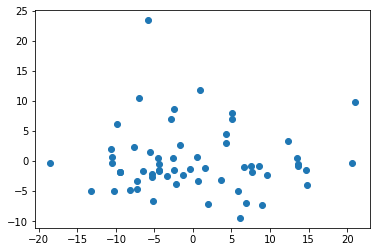

In [44]:
#Use the reduced dimension x-values obtained by the PCA to perform the linear regression

plt.scatter([x[0] for x in x_pca],[x[1] for x in x_pca])